In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


#### Importar base de dados

In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

#### Normalizar e dividir os dados

In [3]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [4]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

#### Estrutura do Autoencoder
- 784 - 32 - 784

In [9]:
# fator_compactacao = 784 / 32
autoencoder = Sequential()
autoencoder.add(Dense(units = 32, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
autoencoder.summary()
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 100, batch_size = 256,
                validation_data = (previsores_teste, previsores_teste))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2759 - accuracy: 0.7827 - val_loss: 0.1879 - val_accuracy: 0.7984
Epoch 2/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1694 - accuracy: 0.8029 - val_loss: 0.1525 - val_accuracy: 0.8056
Epoch 3/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1430 - accuracy: 0.8074 - val_loss: 0.1326 - val_accuracy: 0.8079
Epoch 4/100
60000/

#### Encoder

In [6]:
dimensao_original = Input(shape=(784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [7]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

#### Comparação entre as imagens originais, codificadas e decodificadas

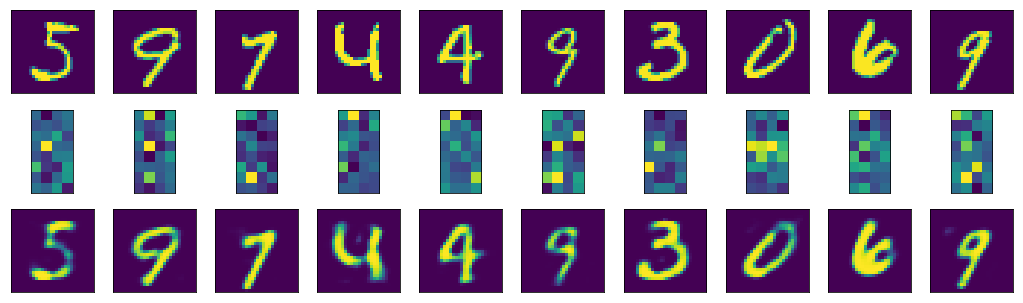

In [8]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
    #print(i)
    #print(indice_imagem)
    
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())